In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
#from sklearn import ensemble, tree, linear_model
import missingno as msno
import statistics as sts

In [2]:
dataset = pd.read_csv("SENSO_DATA_TABLE.csv", sep=",")
dataset.describe()

2010            14       1400506          1402         14004  \
count  27834.000000  27834.000000  2.783400e+04  27834.000000  27834.000000   
mean    2012.000611     32.375153  3.253335e+06   3241.780700  32392.789789   
std        1.414277      9.830374  9.845615e+05    983.288279   9831.435634   
min     2010.000000     11.000000  1.100015e+06   1101.000000  11001.000000   
25%     2011.000000     25.000000  2.512101e+06   2503.000000  25015.000000   
50%     2012.000000     31.000000  3.146255e+06   3110.000000  31047.000000   
75%     2013.000000     41.000000  4.119103e+06   4106.000000  41023.000000   
max     2014.000000     53.000000  5.300108e+06   5301.000000  53001.000000   

              66010          6778           9739  
count  2.783400e+04  2.783400e+04   27834.000000  
mean   8.689910e+05  3.524320e+04   15774.621937  
std    8.960926e+06  2.080519e+05   18989.018189  
min   -1.904600e+04  8.050000e+02   -1460.000000  
25%    5.192775e+04  5.312250e+03    6480.000000  
50%    1.141565e+05  1.119750e+04   11361.000000  
75%    3.056592e+05  2.407750e+04   19029.750000  
max    6.280649e+08  1.189589e+07  815094.000000

In [3]:
dataset.describe(exclude='number')

Roraima São João da Baliza RM do Sul do Estado  \
count          27834              27834                6122   
unique            27               5298                  73   
top     Minas Gerais       São Domingos   RM Belo Horizonte   
freq            4265                 25                 250   

                Sul de Roraima Sudeste de Roraima  
count                    27834              27834  
unique                     137                554  
top     Noroeste Rio-grandense     Ilhéus-Itabuna  
freq                      1080                205

In [4]:
dataset.head()

2010  14  Roraima  1400506 São João da Baliza  RM do Sul do Estado  1402  \
0  2010  14  Roraima  1400605           São Luiz  RM do Sul do Estado  1402   
1  2010  14  Roraima  1400704           Uiramutã                  NaN  1401   
2  2010  15     Pará  1500107         Abaetetuba                  NaN  1504   
3  2010  15     Pará  1500131    Abel Figueiredo                  NaN  1506   
4  2010  15     Pará  1500206              Acará                  NaN  1504   

      Sul de Roraima  14004   Sudeste de Roraima   66010    6778  9739  
0     Sul de Roraima  14004   Sudeste de Roraima   59706    6750  8845  
1   Norte de Roraima  14002  Nordeste de Roraima   55010    8147  6752  
2  Nordeste Paraense  15011               Cametá  583793  141054  4139  
3   Sudeste Paraense  15017          Paragominas   53599    6792  7891  
4  Nordeste Paraense  15012             Tomé-Açu  440767   53605  8223

In [5]:
dataset.shape

(27834, 13)

In [6]:
dataset.columns = ["ano","cod_uf","nome_uf","cod_mun","nome_mun","regiao","cod_meso_reg","nome_meso_reg","cod_mic_reg","nome_min_reg","pib","populacao","pib_per_cap"]

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27834 entries, 0 to 27833
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ano            27834 non-null  int64 
 1   cod_uf         27834 non-null  int64 
 2   nome_uf        27834 non-null  object
 3   cod_mun        27834 non-null  int64 
 4   nome_mun       27834 non-null  object
 5   regiao         6122 non-null   object
 6   cod_meso_reg   27834 non-null  int64 
 7   nome_meso_reg  27834 non-null  object
 8   cod_mic_reg    27834 non-null  int64 
 9   nome_min_reg   27834 non-null  object
 10  pib            27834 non-null  int64 
 11  populacao      27834 non-null  int64 
 12  pib_per_cap    27834 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 2.8+ MB


In [8]:
dataset.head()

ano  cod_uf  nome_uf  cod_mun         nome_mun               regiao  \
0  2010      14  Roraima  1400605         São Luiz  RM do Sul do Estado   
1  2010      14  Roraima  1400704         Uiramutã                  NaN   
2  2010      15     Pará  1500107       Abaetetuba                  NaN   
3  2010      15     Pará  1500131  Abel Figueiredo                  NaN   
4  2010      15     Pará  1500206            Acará                  NaN   

   cod_meso_reg      nome_meso_reg  cod_mic_reg         nome_min_reg     pib  \
0          1402     Sul de Roraima        14004   Sudeste de Roraima   59706   
1          1401   Norte de Roraima        14002  Nordeste de Roraima   55010   
2          1504  Nordeste Paraense        15011               Cametá  583793   
3          1506   Sudeste Paraense        15017          Paragominas   53599   
4          1504  Nordeste Paraense        15012             Tomé-Açu  440767   

   populacao  pib_per_cap  
0       6750         8845  
1       8147         6752  
2     141054         4139  
3       6792         7891  
4      53605         8223

In [9]:
dataset.sample(n=10)

ano  cod_uf            nome_uf  cod_mun        nome_mun  \
21864  2013      43  Rio Grande do Sul  4311643      Linha Nova   
14412  2012      31       Minas Gerais  3101607         Alfenas   
18045  2013      41             Paraná  4101309  Antônio Olinto   
24172  2013      42     Santa Catarina  4206306       Guabiruba   
17523  2013      35          São Paulo  3555000            Tupã   
10777  2011      31       Minas Gerais  3147501        Passabém   
26977  2014      41             Paraná  4120804   Quatro Barras   
11794  2011      31       Minas Gerais  3167202     Sete Lagoas   
16242  2012      31       Minas Gerais  3140704     Mateus Leme   
846    2010      21           Maranhão  2108009     Pastos Bons   

                  regiao  cod_meso_reg                    nome_meso_reg  \
21864                NaN          4305    Metropolitana de Porto Alegre   
14412                NaN          3110            Sul/Sudoeste de Minas   
18045                NaN          4109               Sudeste Paranaense   
24172  RM Vale do Itajaí          4204                   Vale do Itajaí   
17523                NaN          3509                          Marília   
10777                NaN          3107  Metropolitana de Belo Horizonte   
26977        RM Curitiba          4110        Metropolitana de Curitiba   
11794  RM Belo Horizonte          3107  Metropolitana de Belo Horizonte   
16242  RM Belo Horizonte          3107  Metropolitana de Belo Horizonte   
846                  NaN          2104                 Leste Maranhense   

       cod_mic_reg                nome_min_reg      pib  populacao  \
21864        43023                  Montenegro    39784       1692   
14412        31049                     Alfenas  1694258      74804   
18045        41034           São Mateus do Sul   140010       7567   
24172        42012                    Blumenau   780902      20474   
17523        35037                        Tupã  1457290      65540   
10777        31028    Conceição do Mato Dentro    11985       1753   
26977        41037                    Curitiba  1235878      21738   
11794        31027                 Sete Lagoas  6403752     216400   
16242        31030              Belo Horizonte   434682      28417   
846          21018  Chapadas do Alto Itapecuru    70835      18079   

       pib_per_cap  
21864        23513  
14412        22649  
18045        18503  
24172        38141  
17523        22235  
10777         6837  
26977        56853  
11794        29592  
16242        15297  
846           3918

In [10]:
dataset.isnull().sum()

ano                  0
cod_uf               0
nome_uf              0
cod_mun              0
nome_mun             0
regiao           21712
cod_meso_reg         0
nome_meso_reg        0
cod_mic_reg          0
nome_min_reg         0
pib                  0
populacao            0
pib_per_cap          0
dtype: int64

In [11]:
dataset = dataset.drop('regiao', axis=1)
dataset.head()

ano  cod_uf  nome_uf  cod_mun         nome_mun  cod_meso_reg  \
0  2010      14  Roraima  1400605         São Luiz          1402   
1  2010      14  Roraima  1400704         Uiramutã          1401   
2  2010      15     Pará  1500107       Abaetetuba          1504   
3  2010      15     Pará  1500131  Abel Figueiredo          1506   
4  2010      15     Pará  1500206            Acará          1504   

       nome_meso_reg  cod_mic_reg         nome_min_reg     pib  populacao  \
0     Sul de Roraima        14004   Sudeste de Roraima   59706       6750   
1   Norte de Roraima        14002  Nordeste de Roraima   55010       8147   
2  Nordeste Paraense        15011               Cametá  583793     141054   
3   Sudeste Paraense        15017          Paragominas   53599       6792   
4  Nordeste Paraense        15012             Tomé-Açu  440767      53605   

   pib_per_cap  
0         8845  
1         6752  
2         4139  
3         7891  
4         8223

In [12]:
dataset.isnull().sum()

ano              0
cod_uf           0
nome_uf          0
cod_mun          0
nome_mun         0
cod_meso_reg     0
nome_meso_reg    0
cod_mic_reg      0
nome_min_reg     0
pib              0
populacao        0
pib_per_cap      0
dtype: int64

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27834 entries, 0 to 27833
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ano            27834 non-null  int64 
 1   cod_uf         27834 non-null  int64 
 2   nome_uf        27834 non-null  object
 3   cod_mun        27834 non-null  int64 
 4   nome_mun       27834 non-null  object
 5   cod_meso_reg   27834 non-null  int64 
 6   nome_meso_reg  27834 non-null  object
 7   cod_mic_reg    27834 non-null  int64 
 8   nome_min_reg   27834 non-null  object
 9   pib            27834 non-null  int64 
 10  populacao      27834 non-null  int64 
 11  pib_per_cap    27834 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 2.5+ MB


In [14]:
mediana = sts.median(dataset['pib_per_cap'])
mediana

11361.0

In [15]:
dataset['ano'].dtype

dtype('int64')

In [16]:
dataset.loc[(dataset['nome_uf'] ==  "Maranhão" )  & ( dataset['ano'] ==  2014) ].sample(n=5)

ano  cod_uf   nome_uf  cod_mun           nome_mun  cod_meso_reg  \
22954  2014      21  Maranhão  2109239  Presidente Médici          2102   
22717  2014      21  Maranhão  2106326         Maracaçumé          2102   
22697  2014      21  Maranhão  2105302         Imperatriz          2102   
22464  2014      21  Maranhão  2102705         Cantanhede          2101   
22708  2014      21  Maranhão  2105906         Lago Verde          2103   

           nome_meso_reg  cod_mic_reg     nome_min_reg      pib  populacao  \
22954   Oeste Maranhense        21008          Pindaré    38786       6755   
22717   Oeste Maranhense        21007           Gurupi   125920      20549   
22697   Oeste Maranhense        21009       Imperatriz  5805306     252320   
22464   Norte Maranhense        21006  Itapecuru Mirim   103088      21299   
22708  Centro Maranhense        21010     Médio Mearim    87231      15820   

       pib_per_cap  
22954         5742  
22717         6128  
22697        23008  
22464         4840  
22708         5514

In [18]:
dataset_num_df = dataset.select_dtypes(include=['number'])
dataset_num_df.columns

Index(['ano', 'cod_uf', 'cod_mun', 'cod_meso_reg', 'cod_mic_reg', 'pib',
       'populacao', 'pib_per_cap'],
      dtype='object')

In [19]:
dataset_cat_df = dataset.select_dtypes(include=['object'])
dataset_cat_df.columns

Index(['nome_uf', 'nome_mun', 'nome_meso_reg', 'nome_min_reg'], dtype='object')

In [20]:
agrupado_data = dataset.groupby(['ano']).size()
agrupado_data

ano
2010    5564
2011    5565
2012    5565
2013    5570
2014    5570
dtype: int64

In [21]:
agrupado = dataset.groupby(['nome_uf', 'ano']).size()
agrupado

nome_uf    ano 
Acre       2010     22
           2011     22
           2012     22
           2013     22
           2014     22
                  ... 
Tocantins  2010    139
           2011    139
           2012    139
           2013    139
           2014    139
Length: 135, dtype: int64

In [22]:
dataset['populacao'].describe()

count    2.783400e+04
mean     3.524320e+04
std      2.080519e+05
min      8.050000e+02
25%      5.312250e+03
50%      1.119750e+04
75%      2.407750e+04
max      1.189589e+07
Name: populacao, dtype: float64

In [23]:
dataset['pib'].describe()

count    2.783400e+04
mean     8.689910e+05
std      8.960926e+06
min     -1.904600e+04
25%      5.192775e+04
50%      1.141565e+05
75%      3.056592e+05
max      6.280649e+08
Name: pib, dtype: float64

In [24]:
dataset['pib_per_cap'].describe()

count     27834.000000
mean      15774.621937
std       18989.018189
min       -1460.000000
25%        6480.000000
50%       11361.000000
75%       19029.750000
max      815094.000000
Name: pib_per_cap, dtype: float64

In [25]:
dataset.loc[( dataset['pib'] <  0) ]

ano  cod_uf              nome_uf  cod_mun nome_mun  cod_meso_reg  \
14313  2012      24  Rio Grande do Norte  2404507  Guamaré          2402   

          nome_meso_reg  cod_mic_reg nome_min_reg    pib  populacao  \
14313  Central Potiguar        24008        Macau -19046      13047   

       pib_per_cap  
14313        -1460

In [26]:
dataset.isnull().sum()

ano              0
cod_uf           0
nome_uf          0
cod_mun          0
nome_mun         0
cod_meso_reg     0
nome_meso_reg    0
cod_mic_reg      0
nome_min_reg     0
pib              0
populacao        0
pib_per_cap      0
dtype: int64

In [27]:
# Soma do PIB de todas as cidades de cada estado para cada ano.
pib_estado = dataset.groupby(['nome_uf', 'ano'])['pib'].sum().reset_index()
pib_estado.sample(n=10)


nome_uf   ano        pib
16              Amazonas  2011   70734402
93   Rio Grande do Norte  2013   51518454
13                 Amapá  2013   12763485
56    Mato Grosso do Sul  2011   55133157
86                 Piauí  2011   25941369
73               Paraíba  2013   46377285
29                 Ceará  2014  126054476
113              Roraima  2013    9010725
65                Paraná  2010  225205247
52           Mato Grosso  2012   79665685

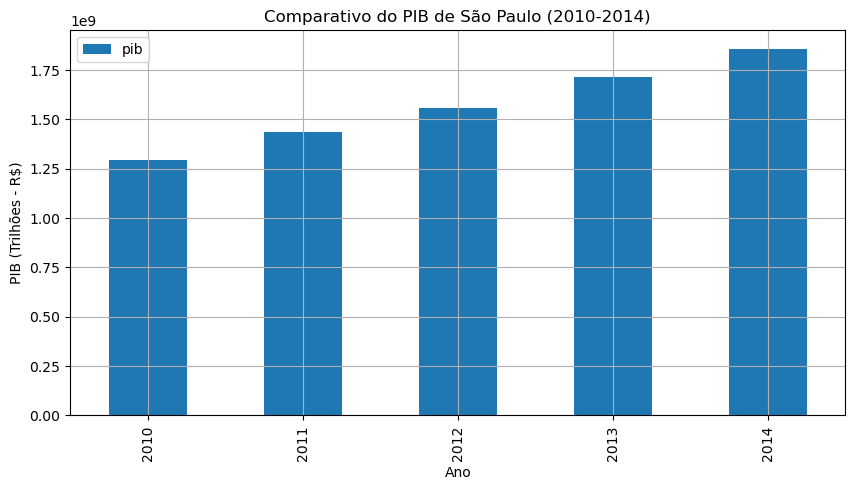

In [56]:
estado_alvo = 'São Paulo'

df_estado = pib_estado[pib_estado['nome_uf'] == estado_alvo]

# Plotar o gráfico comparativo do PIB ao longo dos anos
fig, ax = plt.subplots(figsize=(10, 5))
df_estado.plot(x='ano', y='pib', kind='bar', ax=ax)
plt.title(f'Comparativo do PIB de {estado_alvo} (2010-2014)')
plt.xlabel('Ano')
plt.ylabel('PIB (Trilhões - R$)')
plt.grid(True)
plt.show()

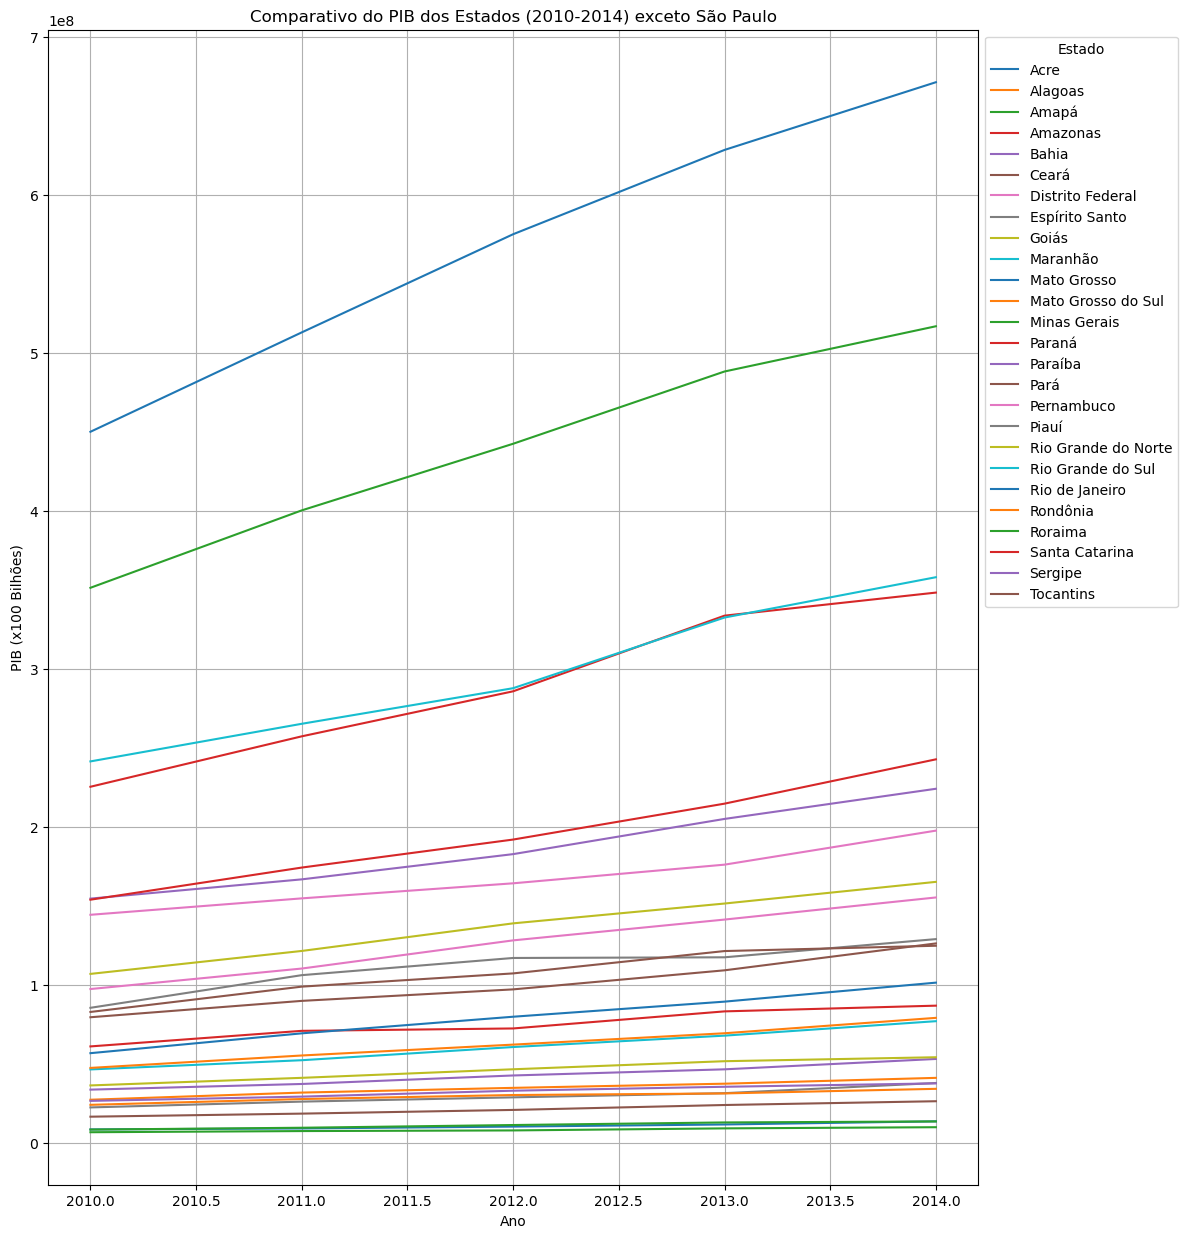

In [53]:
df = pib_estado[['nome_uf', 'ano', 'pib']].drop(df_estado[df_estado['nome_uf'] == 'São Paulo'].index)

# Gráfico de linha comparativo para cada estado
fig, ax = plt.subplots(figsize=(12, 15))
for estado, dados_estado in df.groupby('nome_uf'):
    dados_estado.plot(x='ano', y='pib', kind='line', label=estado, ax=ax)

# Configurar o gráfico
plt.title('Comparativo do PIB dos Estados (2010-2014) exceto São Paulo')
plt.xlabel('Ano')
plt.ylabel('PIB (x100 Bilhões)')
plt.grid(True)
plt.legend(title='Estado', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()